In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders = pd.read_csv(r"C:\Users\sanik\OneDrive\Desktop\Data Analytics\orders.csv")
inventory = pd.read_csv(r"C:\Users\sanik\OneDrive\Desktop\Data Analytics\inventory.csv")
shipments = pd.read_csv(r"C:\Users\sanik\OneDrive\Desktop\Data Analytics\shipments.csv")
suppliers = pd.read_csv(r"C:\Users\sanik\OneDrive\Desktop\Data Analytics\suppliers.csv")


print(orders.columns)
print(inventory.columns)
print(suppliers.columns)
print(shipments.columns)

Index(['Order_ID', 'Product', 'Region', 'Order_Date', 'Delivery_Date',
       'Quantity', 'Order_Status'],
      dtype='object')
Index(['Product', 'Warehouse', 'Stock_Level', 'Reorder_Level', 'Last_Refill',
       'Expiry_Date'],
      dtype='object')
Index(['Supplier_ID', 'Product', 'Lead_Time_Days', 'Reliability (%)'], dtype='object')
Index(['Shipment_ID', 'Order_ID', 'Mode', 'Carrier', 'Distance_km', 'Cost',
       'Delay_Days'],
      dtype='object')


In [16]:
# Orders
orders['Order_Date'] = pd.to_datetime(orders['Order_Date'], errors='coerce')
orders['Delivery_Date'] = pd.to_datetime(orders['Delivery_Date'], errors='coerce')
orders.dropna(subset=['Order_ID', 'Product', 'Quantity', 'Order_Date'], inplace=True)

# Inventory
inventory['Last_Refill'] = pd.to_datetime(inventory['Last_Refill'], errors='coerce')
inventory['Expiry_Date'] = pd.to_datetime(inventory['Expiry_Date'], errors='coerce')
inventory.fillna({'Stock_Level': 0, 'Reorder_Level': 10}, inplace=True)

# Shipments
shipments.fillna({'Cost': shipments['Cost'].median(), 'Delay_Days': 0}, inplace=True)

# Suppliers
suppliers.rename(columns={'Reliability (%)': 'Reliability'}, inplace=True)
suppliers['Reliability'] = suppliers['Reliability'].fillna(suppliers['Reliability'].mean())



In [17]:
sns.set(style="whitegrid")

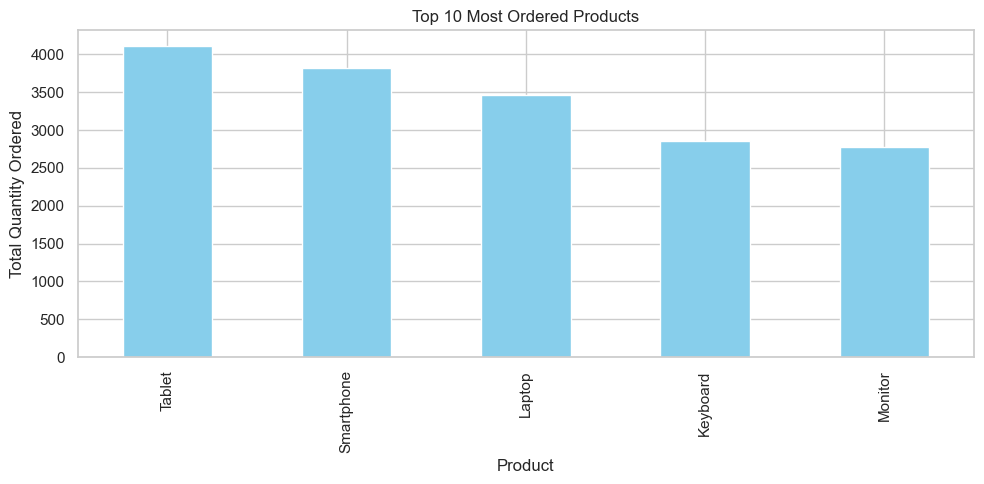

In [18]:
# 1. Top ordered products
top_products = orders.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Ordered Products")
plt.ylabel("Total Quantity Ordered")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

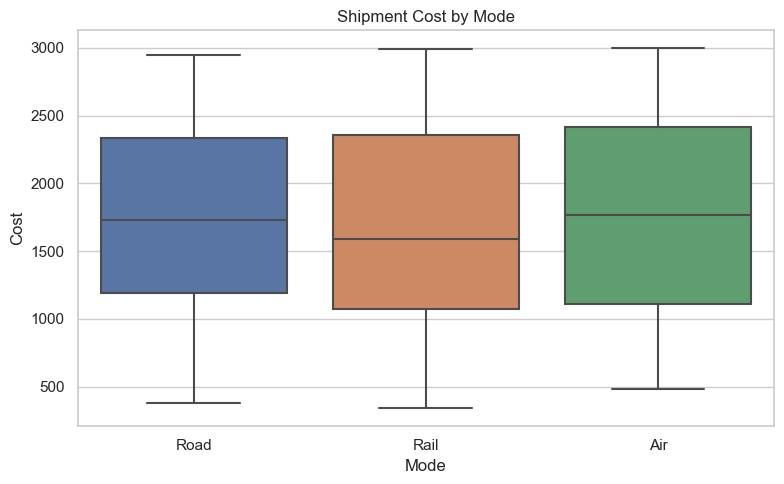

In [19]:
# 2. Shipment cost by mode
plt.figure(figsize=(8,5))
sns.boxplot(data=shipments, x='Mode', y='Cost')
plt.title("Shipment Cost by Mode")
plt.tight_layout()
plt.show()

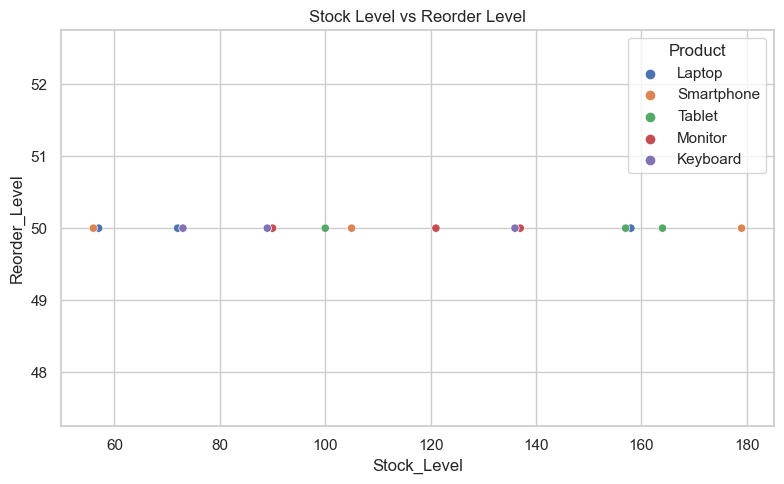

In [20]:
# 3. Inventory: Stock vs Reorder
plt.figure(figsize=(8,5))
sns.scatterplot(data=inventory, x='Stock_Level', y='Reorder_Level', hue='Product')
plt.title("Stock Level vs Reorder Level")
plt.tight_layout()
plt.show()

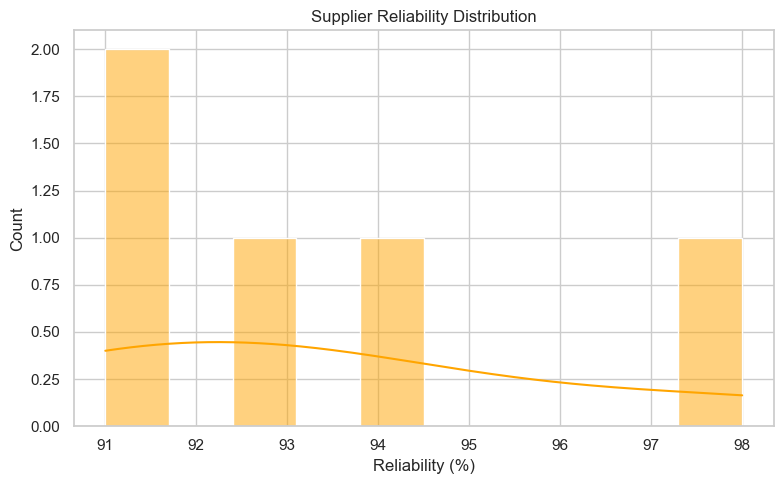

In [21]:
# 4. Supplier reliability distribution
plt.figure(figsize=(8,5))
sns.histplot(suppliers['Reliability'], bins=10, kde=True, color='orange')
plt.title("Supplier Reliability Distribution")
plt.xlabel("Reliability (%)")
plt.tight_layout()
plt.show()

2025-07-26 01:15:10.827 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 01:15:10.828 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 01:15:11.531 
  command:

    streamlit run C:\Users\sanik\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-26 01:15:11.533 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 01:15:11.534 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 01:15:11.535 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-26 01:15:11.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn